/tmp/ipykernel_322259/4254342383.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataout0 = pd.concat([dataout0,data0],axis=0);


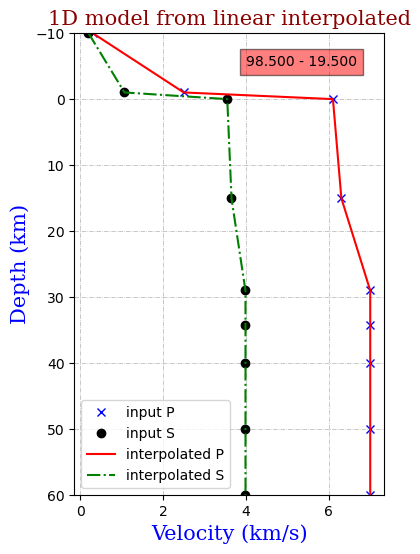

In [56]:
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''
1D inteplote for VR array data
'''
# -----------------------------------------------------------
file = 'output/models_layercake/model_098.500_19.500.dat'
data = pd.read_csv(file,skiprows=0,header=1,delim_whitespace=True,index_col=None)
# new array for the 1D interpolation
xi=np.linspace((data['dep'][0]),data['dep'][len(data['dep'])-1],int((data['dep'][len(data['dep'])-1]-data['dep'][0])*100)+1)
# fake a new deplist
dep_list = [-10,-1,0,10,20,30,40,60,120,660];
# scipy 1D nearest interpolation
fp = interpolate.interp1d(data['dep'], data['vp'], kind = 'linear');
yp_i = fp(xi);
#
fs = interpolate.interp1d(data['dep'], data['vs'], kind = 'linear');
ys_i = fs(xi)
# grasp for the output
file_out='output/models_gradient/'+file.split("/")[-1]
fig_out='output/figures/'+file.split("/")[-1]+'.png'
#
dataout = pd.concat([pd.DataFrame(yp_i,columns=["vp"]),
                    pd.DataFrame(ys_i,columns=["vs"]),
                    pd.DataFrame(xi,columns=["dep"])],
                    axis=1);
dataout0=pd.DataFrame([],columns=["vp","vs","dep"])
for i in dep_list:
    data0 = dataout[dataout['dep']==i]
    dataout0 = pd.concat([dataout0,data0],axis=0);
dataout0.reset_index(drop=True,inplace=True)

# -------------- Plot the figure out ----------------- 
fig,ax1 = plt.subplots(1,1,figsize=(4,6),frameon=True)

font2 = {'family':'serif','color':'blue','size':15}
font3 = {'family':'serif','color':'darkred','size':15}

ax1.plot(data['vp'].to_numpy(),data['dep'].to_numpy(),'xb',label='input P');
ax1.plot(data['vs'].to_numpy(),data['dep'].to_numpy(),'ok',label='input S');
ax1.plot(yp_i,xi,'-r',label='interpolated P');
ax1.plot(ys_i,xi,'-.g',label='interpolated S');
#     
ax1.invert_yaxis()
ax1.set_ylabel('Depth (km)',fontdict = font2)
ax1.set_xlabel('Velocity (km/s)',fontdict = font2)
ax1.grid(linestyle='-.',lw=0.5)
ax1.set_title(f"1D model from linear interpolated",fontdict = font3)
ax1.legend()
ax1.set_ylim(-10,60)
ax1.invert_yaxis()
txt = file.split("/")[-1].split("_")[1][1:7]+' - '+file.split("/")[-1].split("_")[2][0:6]
ax1.text(4,-5,txt,bbox=dict(facecolor='red', alpha=0.5))
#         
plt.savefig(fig_out,bbox_inches='tight',dpi=100,transparent=False)
plt.show()
# -------------- --------------------------------------------------------------- ----------------- 